<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/ChallengeProject_Jeopardy/jeapordy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing Challenge Project
https://www.codecademy.com/paths/data-science/tracks/dscp-hypothesis-testing/modules/dscp-hypothesis-testing-challenge-projects/projects/this-is-jeopardy

# Tasks 1 and 2
Import libraries and CSV data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_colwidth', -1)

df = pd.read_csv('jeopardy.csv')

#rename columns by stripping whitespace
current_columns = df.columns.tolist()
columns = []
for column in current_columns:
  columns.append(column.replace(" ", "").strip())

df = df.rename(columns=dict(zip(current_columns, columns)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


# Define methods

# Tasks 3 and 4

Note: this method is not my code as I had difficulties and copied the solution.

In [ ]:
#I COMPLETELY STRUGGLED HERE AND HAD TO LOOK AT THE SOLUTION - THIS IS NOT MY CODE
# Filtering a dataset by a list of words
def filter_question_data(data, words):
  # Lowercases all words in the list of words as well as the questions. Returns true is all of the words in the list appear in the question.
  filter = lambda x: all(word.lower() in x.lower() for word in words)
  # Applies the labmda function to the Question column and returns the rows where the function returned True
  return data.loc[data["Question"].apply(filter)]


#Tasks 5, 6, etc.

In [ ]:
def filter_answer_data(data, word):
  myList = []
  for index, row in data.iterrows():
    if word.lower() in row['Answer'].lower():
      if(row['Answer'] not in myList):
        myList.append(row['Answer'])
  
  return myList

# More advanced method for checking words in answers in that it can take a list of words
# and returns a dataframe of {word:count}
def get_unique_answers(data, words):
  #The way I interpreted the requirement was simply to count the number of unique values
  #Which could be done as follows using RETURN instead of PRINT
  #print(data.Answer.nunique())

  newDF = pd.DataFrame(index=words, columns=['Count'])
  
  for word in words:
    mylist = filter_answer_data(data, word)
    newDF.at[word, 'Count'] = len(mylist)
  
  return newDF
  
# Get the unique round names and return them in a dictionary with a count of 0 for each
def group_by_round(rounds):

  roundsDict = {}
  for round in sorted(rounds):
    if round not in roundsDict:
      '''
      create key/value pair = round/empty place holder = 0
      this is so that we can use this method for other purposes
      '''
      roundsDict.update({round: 0})

  return roundsDict


# Filtering a dataset by a list of words on the column Category
# This is a copy/paste/modify of another method
def filter_category_data(data, words):
  # Lowercases all words in the list of words as well as the questions. Returns true is all of the words in the list appear in the question.
  filter = lambda x: all(word.lower() in x.lower() for word in words)
  # Applies the labmda function to the Question column and returns the rows where the function returned True
  return data.loc[data["Category"].apply(filter)]



# 'Main' body
#Tasks 5, 6, etc.

In [ ]:
# Testing the filter function
filtered = filter_question_data(df, ["KING", "England"])
print(filtered)

#Creat a new column NewValue which is the column value converted to Float
#First replace None to O
df['NewValue'] =  df['Value'].apply(lambda x: re.sub('None', '0', x))
#Next strip out non integers - in this case we are looking for dollar signs
df['NewValue'] =  df['Value'].apply(lambda x: re.sub(r'[\D]*','', x))
#Convert to float
df['NewValue'] = pd.to_numeric(df['NewValue'])



kingQuestionsFloat = filter_question_data(df, ["KING"])
kingQuestionsFloat_mean = np.mean(kingQuestionsFloat['NewValue'])

print("The mean value for questions containing 'King' is $"+str(round(kingQuestionsFloat_mean, 2)))

#Advanced method - look for multiple words
answerResults = get_unique_answers(kingQuestionsFloat, ["Henry VIII", "Lear"])
print(answerResults)


        ShowNumber  ...                        Answer
4953    3003        ...  Philately (stamp collecting)
6337    3517        ...  Ethelred                    
9191    3907        ...  Henry V                     
11710   2903        ...  James I                     
13454   4726        ...  4                           
...      ...        ... ..                           
208295  4621        ...  William the Conqueror       
208742  4863        ...  William of Orange roughy    
213870  5856        ...  George III                  
216021  1881        ...  Edward VII                  
216789  5070        ...  Wessex                      

[152 rows x 7 columns]
The mean value for questions containing 'King' is $785.67
           Count
Henry VIII  3   
Lear        6   


# Task 7a

Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word "Computer" compared to questions from the 2000s?

In [ ]:
#Check increase of occurenct of questions from the 90's to the 2000's
nineties = df.query("AirDate >= '1990-01-01' and AirDate < '2000-01-01'")
twoThousands = df.query("AirDate >= '2000-01-01'")

ninetiesFilteredQuestions = filter_question_data(nineties, ["Computer"])
twoThousandsFilteredQuestions = filter_question_data(twoThousands, ["Computer"])

countNineties = ninetiesFilteredQuestions.AirDate.count()
countTwoThousands = twoThousandsFilteredQuestions.AirDate.count()
decadeIncrease =  round(((countTwoThousands-countNineties)/countNineties)*100, 2 )
print("There were "+str(countNineties)+" mentions of 'Computer' in the 90's vs. "+str(countTwoThousands)+" in the 2000's for an increase of "+str(decadeIncrease)+"%.")


There were 98 mentions of 'Computer' in the 90's vs. 327 in the 2000's for an increase of 233.67%.


# Task 7b

Is there a connection between the round and the category? Are you more likely to find certain categories, like "Literature" in Single Jeopardy or Double Jeopardy?

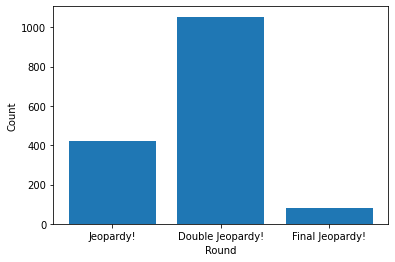

Answer: no there is no connection since the occurfences increase from the 1st round to the 2nd rounds, but then decrese in the 3rd.


In [ ]:

literatureFilteredQuestions = filter_category_data(df, ["Literature"])

#Create a dict with the unique rounds
rounds = group_by_round(literatureFilteredQuestions['Round'])

for roundLabel, countValue in rounds.items():
  rounds[roundLabel] = literatureFilteredQuestions.query("Round == @roundLabel").Round.count()

# Sort in order of round difficulty
keyorder = ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!']
rounds = dict(sorted(rounds.items(), key=lambda i:keyorder.index(i[0])))


#now plot the results to use for data exploration
plt.bar(list(rounds.keys()), list(rounds.values()))
plt.xlabel('Round')
plt.ylabel('Count')
plt.show()

print("Answer: no there is no connection since the occurfences increase from the 1st round to the 2nd rounds, but then decrese in the 3rd.")

# Task 7c

Build a system to quiz yourself. Grab random questions, and use the input function to get a response from the user. Check to see if that response was right or wrong. Note that you can’t do this on the Codecademy platform — to do this, download the data, and write and run the code on your own computer!

In [ ]:
for i in range(0,3):
  rQuestionEntry = df.sample()
  print("Question: "+rQuestionEntry.Question.to_string(index=False).strip())

  correctAnswer = rQuestionEntry.Answer.to_string(index=False).strip()
  userAnswer = input("Answer: ")

  print("You answered: "+userAnswer)
  if (userAnswer == correctAnswer):
    print("That is correct!")
  else:
    print("Incorrect. The correct answer is: "+correctAnswer)

Question: The theme of Richard Nixon's second inaugural parade, he thought he'd be in office to celebrate it
Answer: Unknown
You answered: Unknown
Incorrect. The correct answer is: the Bicentennial
Question: During the Han dynasty, over 2,000 years ago, the Chinese were out flying these
Answer: Kites
You answered: Kites
That is correct!
Question: This No. 1 U.S. bleach company was originally known as The Electro-Alkaline Company
Answer: Clorox
You answered: Clorox
That is correct!
